
# Integrated Machine Learning Material

### Note
The objective of this notebook is to introduce you to the fundamentals of Machine Learning (ML).

For this purpose, we will work with a dataset that you will process by **handling missing data, standardizing the values, and implementing ML models** to solve specific problems.

 **Please save a copy to your Google Drive before making any changes** by selecting `File > Save a copy in Drive`.

---

Enjoy learning!

Author: Graciela Ramirez A.



## Machine Learning Theory

### What is Machine Learning?

Machine Learning (ML) is a subset of Artificial Intelligence that enables machines to learn and improve automatically from data without explicit programming.

### Types of Learning
- **Supervised**: Training with labeled data.
- **Unsupervised**: Identifying patterns in unlabeled data.
- **Semi-supervised**: A mix of labeled and unlabeled data.
- **Reinforcement Learning**: Learning through rewards in an interactive environment.

In this notebook we will focus on **supervised** and **unsupervised** learning

---

## Steps in an ML Project
1. Data collection.
2. Data preprocessing.
3. Model selection and training.
4. Model evaluation.


---

## Key Concepts
- **Data**: The quality of data determines model quality.
- **Models**: Choose based on the problem (classification, regression, clustering).
- **Metrics**: Accuracy, Precision, Recall, F1-score, etc.



## Practical Exercises

### Initial Setup
Ensure the necessary libraries are installed before proceeding.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer

## Load Titanic csv files
In this exercise, we will utilize the Titanic dataset, which contains information about the passengers aboard the Titanic during its ill-fated maiden voyage. The dataset provides details such as passenger demographics, ticket information, class of travel, and survival status. It is commonly used in data analysis and machine learning exercises to explore data cleaning, feature engineering, and predictive modeling techniques. This dataset is particularly valuable for classification problems, as the goal is often to predict the survival of passengers based on various attributes.

**Below is a detailed description of these variables:**

1. PassengerId

    Type: Numerical
    Description: A unique identifier for each passenger in the dataset.
    Purpose: Serves as an index to identify passengers and has no predictive value.

2. Survived

    Type: Categorical (Binary: 0 or 1)
    Description: Indicates whether the passenger survived the disaster.
        0: Did not survive
        1: Survived
    Purpose: Target variable for predictive modeling.

3. Pclass

    Type: Categorical (Ordinal)
    Description: Ticket class of the passenger, indicating socioeconomic status.
        1: First class (upper class)
        2: Second class (middle class)
        3: Third class (lower class)
    Purpose: An important feature for predicting survival, as passengers in higher classes had better survival rates.

4. Name

    Type: Text
    Description: The full name of the passenger, including title and surname.
    Purpose: May provide additional insights, such as social status or family connections, through the passenger's title.

5. Sex

    Type: Categorical
    Description: Gender of the passenger (male or female).
    Purpose: Strongly correlated with survival, as women were prioritized during rescue efforts.

6. Age

    Type: Numerical (Continuous)
    Description: Age of the passenger in years. Some values may be missing and need to be imputed.
    Purpose: Age is a key factor, as children were also prioritized for rescue.

7. SibSp

    Type: Numerical (Discrete)
    Description: Number of siblings or spouses aboard the Titanic with the passenger.
    Purpose: Indicates family connections, which may influence survival likelihood.

8. Parch

    Type: Numerical (Discrete)
    Description: Number of parents or children aboard the Titanic with the passenger.
    Purpose: Similar to SibSp, it captures family ties and their potential impact on survival.

9. Ticket

    Type: Text
    Description: The ticket number assigned to the passenger.
    Purpose: Could offer insights into groupings or class, but is generally not directly useful for modeling.

10. Fare

    Type: Numerical (Continuous)
    Description: The fare paid for the ticket in British pounds.
    Purpose: Reflects socioeconomic status and correlates with Pclass.

11. Cabin

    Type: Text
    Description: The cabin number assigned to the passenger. Many values are missing.
    Purpose: Provides information about the passenger's location on the ship, which may influence survival.

12. Embarked

    Type: Categorical
    Description: Port of embarkation for the passenger.
        C: Cherbourg
        Q: Queenstown
        S: Southampton
    Purpose: May reflect travel routes and socioeconomic factors related to survival.

Load the train and test csv files

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Balanced or unbalanced dataset

A **desbalanced** dataset (or unbalanced dataset) occurs when the distribution of target classes in a dataset is **uneven**, meaning that one or more classes have significantly more examples than others. This imbalance can negatively affect the performance of machine learning models, particularly for classification tasks.

The following lines of code illustrate the distribution of classes in the context of the survivors of this dataset.

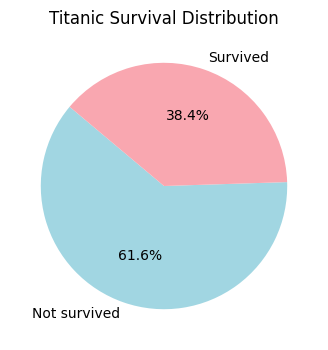

In [ ]:
import matplotlib.pyplot as plt

survival_counts = df["Survived"].value_counts()


pastel_colors = ["#A1D6E2", "#F9A7B0"]


plt.figure(figsize=(4, 4))
plt.pie(survival_counts, labels=["Not survived", "Survived"], colors=pastel_colors, autopct='%1.1f%%', startangle=140)
plt.title("Titanic Survival Distribution")
plt.show()

## Data visualization
Understanding the data is a crucial step in solving any problem effectively. By visualizing the data, we can uncover patterns, trends, and insights that might not be immediately apparent from raw numbers. This step not only enhances our comprehension of the dataset but also helps us identify key factors influencing the problem we aim to solve.

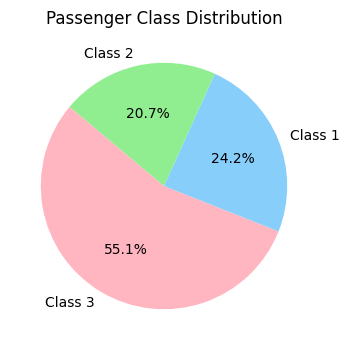

In [ ]:
# Distribution of passenger classes
class_counts = df["Pclass"].value_counts()

# Custom pastel colors
pastel_colors = ["#FFB6C1", "#87CEFA", "#90EE90"]  # Adjust colors as needed

plt.figure(figsize=(4, 4))
plt.pie(class_counts, labels=["Class 3", "Class 1", "Class 2"], colors=pastel_colors, autopct='%1.1f%%', startangle=140)
plt.title("Passenger Class Distribution")
plt.show()


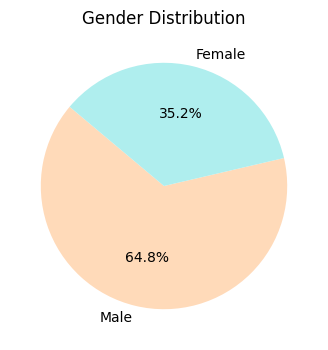

In [ ]:
# Distribution of genders
gender_counts = df["Sex"].value_counts()

# Custom pastel colors
pastel_colors = ["#FFDAB9", "#AFEEEE"]

plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels=["Male", "Female"], colors=pastel_colors, autopct='%1.1f%%', startangle=140)
plt.title("Gender Distribution")
plt.show()


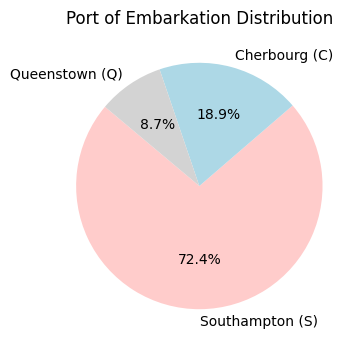

In [ ]:
# Distribution of embarkation ports
embarked_counts = df["Embarked"].value_counts()

# Custom pastel colors
pastel_colors = ["#FFCCCB", "#ADD8E6", "#D3D3D3"]

plt.figure(figsize=(4, 4))
plt.pie(embarked_counts, labels=["Southampton (S)", "Cherbourg (C)", "Queenstown (Q)"], colors=pastel_colors, autopct='%1.1f%%', startangle=140)
plt.title("Port of Embarkation Distribution")
plt.show()


## Missing data

The function **df.isnull().sum()** is used in **pandas** to identify and count the number of missing (NaN) values in each column of a DataFrame

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


##Using the **KNN algorithm** to impute **numeric** missing data.


**KNNImputer** works as follows:

1. Identify Missing Values:

    The algorithm starts by identifying the missing values (NaN) in the dataset.

2. Select Neighbors:
    For each data point with missing values, the algorithm finds its *k* nearest neighbors in the dataset based on a similarity metric (e.g., Euclidean distance).
    Distance is calculated using only the features without missing values (i.e., the non-missing entries for that row are used).

3. Impute Missing Values:
    The missing value is filled by taking the mean (default) or another aggregation function (e.g., median) of the corresponding values from the *k*-nearest neighbors.

4. Repeat for All Missing Values:
    The process is repeated for every feature with missing values.

**KNNImputer** can work directly with columns like **Age** because they are numeric.

In [ ]:

imputer = KNNImputer(n_neighbors=5)
df[['Age']] = imputer.fit_transform(df[['Age']])



##Using **df.groupby()** to impute missing values in the Cabin column using the most frequent cabins per class (Pclass).

The Titanic database also has missing data in the **Cabin** variable. This variable is highly related to **Pclass**, as the cabin assignments were determined by the class of the passenger.

Passengers in First Class (Pclass = 1) were more likely to have cabin information recorded due to better accommodations and record-keeping, while passengers in Third Class (Pclass = 3) often did not have their cabin information documented. As a result, the proportion of missing values in the Cabin variable increases as the class decreases. This relationship can be leveraged during data imputation or analysis to infer potential cabin groups based on passenger class

If the analysis suggests that most cabins are associated with certain levels or classes, you could impute the missing values using the most frequent cabin in its class (Pclass).

The **df.groupby()** function in pandas is a powerful tool for performing group operations on a DataFrame. It allows you to group data based on one or more columns and then apply aggregate or transformation operations on those groups.

The function splits the DataFrame into groups based on the values in one or more specified columns

In [ ]:
# First, calculate the most frequent 'Cabin' per 'Pclass'.
cabin_modes_train = df.groupby('Pclass')['Cabin'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'U')

#  Then, apply the imputation directly in the 'Cabin' column.
df['Cabin'] = df.apply(lambda row: cabin_modes_train[row['Pclass']] if pd.isnull(row['Cabin']) else row['Cabin'], axis=1)

##Using **df.fillna() with mode** to impute missing values

Since there are few categories in Embarked, a common approach is to fill in missing values with the most frequent value (in this case is selected the mode). In this dataset, it is common for Southampton (S) to be the most frequent port.

**df.fillna**() is used to fill missing values (NaN) in the Embarked column of the DataFrame df with the most frequent value (mode) in that column. Let's break it down step by step:

In [ ]:
df.fillna({'Embarked': df['Embarked'].mode()[0]}, inplace=True)

## Verifying that no data is missing

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0




We are not missing any features, but now, let's select the variables.  By simple inspection we decided to use

*   Sex
*   Embarked
*   Pclass
*   Age
*   Fare



## Working with categorical data

The **pd.get_dummies()** function in pandas is used to perform **one-hot encoding** for categorical variables. It converts categorical data into a numerical format by creating a new column for each unique category in the original column, with binary values indicating the presence (1) or absence (0) of that category.

In the Titanic dataset, the variables **Sex, Embarked** and **Pclass** will be converted to one-hot encoding

In [ ]:
# Codificar variables categóricas (One-Hot Encoding)
df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)



## StandardScaler function
The StandardScaler function in scikit-learn is used to standardize or normalize numerical features by scaling them to have a mean of 0 and a standard deviation of 1. This is often a crucial step in machine learning workflows, as many algorithms perform better or converge faster when features are standardized.

Many machine learning models (e.g., SVMs, logistic regression, neural networks) are sensitive to the scale of input features.
Features with larger ranges might dominate the learning process, leading to suboptimal models.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Seleccionar columnas numéricas
numerical_cols = ['Age', 'Fare']

# Escalar o normalizar los datos
scaler = StandardScaler()  # O usa MinMaxScaler() para normalización
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",-0.592481,1,0,A/5 21171,-0.502445,G6,True,False,True,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.638789,1,0,PC 17599,0.786845,C85,False,False,False,False,False
2,3,1,"Heikkinen, Miss. Laina",-0.284663,0,0,STON/O2. 3101282,-0.488854,G6,False,False,True,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.407926,1,0,113803,0.420730,C123,False,False,True,False,False
4,5,0,"Allen, Mr. William Henry",0.407926,0,0,373450,-0.486337,G6,True,False,True,False,True


## Transformation of the Test data partition
After completing the transformation of the training data, we must apply the same strategies to transform the test data partition. This ensures consistency between the training and test datasets, allowing the model to perform effectively on unseen data.

First, we will identify the missing data in the test partition. This step is crucial for understanding which features require imputation or further preprocessing to ensure consistency with the training data.

Function **df.isnull().sum**

In [ ]:
df_T= pd.read_csv('test.csv')
df_T.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


Now, apply the same transformation to the test dataset.

It is important to only **transform** the data, in this case, using the result of the KNNImputer applied to the Training partition

In [ ]:

df_T[['Age']] = imputer.transform(df_T[['Age']])

Similarly, for the 'Cabin' and 'Fare' variables, it is crucial to apply the transformation to the test data exclusively based on the values previously calculated from the training dataset.

In [ ]:
df_T['Cabin'] = df_T.groupby('Pclass')['Cabin'].apply(lambda x: x.fillna(cabin_modes_train[x.name])).reset_index(drop=True)

In [ ]:
fare_mean = df['Fare'].mean()

df_T.fillna({'Fare': fare_mean}, inplace=True)

In [ ]:
df_T[numerical_cols] = scaler.transform(df_T[numerical_cols])

In [ ]:
df_T = pd.get_dummies(df_T, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)


Now, verify that the entire test dataset is complete, ensuring there are no remaining missing values before proceeding with further analysis or modeling

In [ ]:
df_T.isnull().sum()

,0
PassengerId,0
Name,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,0
Sex_male,0
Embarked_Q,0


In [ ]:
df_T.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,892,"Kelly, Mr. James",0.369449,0,0,330911,-0.490783,B96 B98,True,True,False,False,True
1,893,"Wilkes, Mrs. James (Ellen Needs)",1.331378,1,0,363272,-0.507479,B45,False,False,True,False,True
2,894,"Myles, Mr. Thomas Francis",2.485693,0,0,240276,-0.453367,E31,True,True,False,True,False
3,895,"Wirz, Mr. Albert",-0.207709,0,0,315154,-0.474005,B96 B98,True,False,True,False,True
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",-0.592481,1,1,3101298,-0.401017,B96 B98,False,False,True,False,True


## ML model implementation


The correct data classification is provided in the gender_submission.csv

In [ ]:
uploaded = files.upload()  #load the csv gender_submission file

Saving gender_submission.csv to gender_submission.csv


In [ ]:
test_prediction = pd.read_csv('gender_submission.csv')

In [ ]:
test_prediction

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


##K-Nearest Neighbors (KNN) algorithm

K-Nearest Neighbors (KNN) is primarily a classification and regression algorithm. However, it is often confused with clustering due to its similarity in using "neighborhood" concepts. For clustering tasks, you might actually mean K-Means (used for unsupervised clustering).

How it Works:

1. Identify the *k* closest data points (neighbors) to the target point based on a distance metric (e.g., Euclidean distance).
2. For Classification:
  Assign the class label most common among the kk neighbors.
3. For Regression:
  Calculate the average (or weighted average) of the neighbors' values

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

X_train = df[['Age', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Pclass_2', 'Pclass_3']]
y_train = df['Survived']  # Target variable



In [ ]:

X_test = df_T[['Age', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Pclass_2', 'Pclass_3']]
y_test = test_prediction['Survived']  # Target variable

We will consider only 5 neighbors

In [ ]:
# Create the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # Puedes ajustar n_neighbors para experimentar

# Fit the model
knn.fit(X_train, y_train)

# Make predictions with test data
y_pred = knn.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       266
           1       0.78      0.83      0.80       152

    accuracy                           0.85       418
   macro avg       0.84      0.85      0.84       418
weighted avg       0.85      0.85      0.85       418



The **Classification Report** in scikit-learn provides a detailed breakdown of a classification model's performance across its classes. It summarizes key evaluation metrics for each class, helping you assess how well the model predicts each label.

1. Precision:  The ratio of correctly predicted positive observations to the total predicted positives.

2. Recall: The ratio of correctly predicted positive observations to all actual positives.

3. F1-Score: The harmonic mean of precision and recall.

4. Macro Avg: The average of precision, recall, and F1-score across all classes, treating all classes equally. Does not consider class imbalance.

5. Weighted Avg: The average of precision, recall, and F1-score across all classes, weighted by the support of each class. Useful when the dataset is imbalanced.

## Confusion Matrix

The **confusion matrix** is a powerful tool for evaluating the performance of a classification model because it provides a detailed summary of prediction results by comparing predicted classes with actual classes. It is particularly useful because it allows you to analyze and understand model behavior beyond overall accuracy, identifying specific strengths and weaknesses


Confusion Matrix:


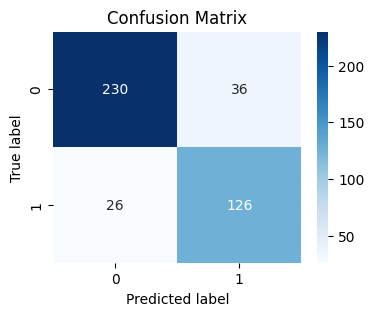

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')


plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


## **SelectKBest**: Feature selection method

**SelectKBest** is a feature selection method provided by scikit-learn that selects the top *k* features based on a statistical measure of relevance with respect to the target variable. It is commonly used to reduce the dimensionality of a dataset, improving model performance and reducing overfitting by eliminating less important features.

**f_classif**, measures dependence or variance between categories specifying that the scoring function for feature selection is Analysis of Variance (ANOVA) F-statistic. This is used to evaluate the relationship between each feature and the target variable in classification tasks.

Based on the scores, the SelectKBest method retains the *k* features with the highest scores and discards the rest.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select the 2 best features using SelectKBest
selector = SelectKBest(score_func=f_classif, k=2)  # We use f_classif for continuous data keeping only the best 2 because k=2.
X_new = selector.fit_transform(X_train, y_train)

# Obtain the two most significant characteristics
cols = selector.get_support(indices=True)
print("The most significant features are:", X_train.columns[cols])

The most significant features are: Index(['Sex_male', 'Pclass_3'], dtype='object')


##Using Pearson Correlation to Identify Relevant Features

**Pearson correlation** is a statistical measure that quantifies the linear relationship between two variables. In feature selection, it can be used to assess the relevance of features with respect to the target variable by identifying features that are strongly correlated (positively or negatively) with the target.

In [ ]:
from scipy.stats import pearsonr

def pearson_score(X, y):
    scores = []
    p_values = []
    for i in range(X.shape[1]):
        score, p_value = pearsonr(X[:, i], y)
        scores.append(abs(score))
        p_values.append(p_value)
    return np.array(scores), np.array(p_values)


selector = SelectKBest(score_func=pearson_score, k=2)
X_new = selector.fit_transform(X_train, y_train)

# Show Pearson correlation scores and selected features
print("Pearson correlation scores:", selector.scores_)
cols = selector.get_support(indices=True)
print("The most significant features are:", X_train.columns[cols])



Pearson correlation scores: [0.06980852 0.25730652 0.54335138 0.00365038 0.14968272 0.09334857
 0.32230836]
The most significant features are: Index(['Sex_male', 'Pclass_3'], dtype='object')


In [ ]:
X_train

,Age,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,-0.592481,-0.502445,True,False,True,False,True
1,0.638789,0.786845,False,False,False,False,False
2,-0.284663,-0.488854,False,False,True,False,True
3,0.407926,0.420730,False,False,True,False,False
4,0.407926,-0.486337,True,False,True,False,True
...,...,...,...,...,...,...,...
886,-0.207709,-0.386671,True,False,True,True,False
887,-0.823344,-0.044381,False,False,True,False,False
888,0.000000,-0.176263,False,False,True,False,True
889,-0.284663,-0.044381,True,False,False,False,False


## Implementing a Multi-layer Perceptron model

The MLPClassifier is a function provided by the scikit-learn library to create a multi-layer perceptron (MLP), a type of neural network for supervised learning tasks such as classification.

It is part of the sklearn.neural_network module and supports a wide range of configurations for creating neural networks with one or more hidden layers

The following code implements a MLP with 100 neurons in the hidden layer and 500 epochs in training.

Confusion Matrix:


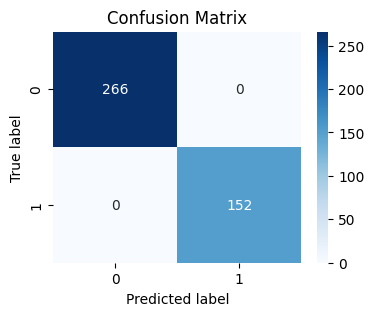


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       152

    accuracy                           1.00       418
   macro avg       1.00      1.00      1.00       418
weighted avg       1.00      1.00      1.00       418



In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create the neural architecture
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# Train the model
mlp.fit(X_train[['Sex_male', 'Pclass_3']], y_train)

# Prediction results with the test data
y_pred = mlp.predict(X_test[['Sex_male', 'Pclass_3']])

# Confusion matrix results
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Añadir etiquetas y título
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

## Implementing a clustering algorithm: KMeans

The KMeans algorithm is a popular unsupervised machine learning method used for clustering data into *k* groups (or clusters). The goal is to partition the dataset into *k* clusters, where each data point belongs to the cluster with the nearest mean.

The algorithm works as follows:

**Initialization**
*  Select *k*, the number of clusters to form.
*  Initialize *k* centroids (points representing the center of a cluster). This can be done randomly, or with methods like k-means++ for better initial placement.

**Assignment Step**

For each data point in the dataset:

*  Calculate its distance (commonly using Euclidean distance) to each of the *k* centroids.
*   Assign the data point to the cluster with the nearest centroid.

**Update Step**

After all data points are assigned:

* Recalculate the centroid of each cluster by computing the mean of all the data points in that cluster.
* The new centroids represent the updated "center" of each cluster.

**Repeat**

Repeat the Assignment Step and Update Step iteratively until convergence. Convergence occurs when:

* Centroids no longer change significantly, or
* The assignments of data points to clusters do not change, or
* A predefined maximum number of iterations is reached.

**Output**

The algorithm outputs:
* The final positions of the centroids.
*  The cluster labels for each data point.


The following code implements a KMeans algorithm considering 4 clusters

Confusion Matrix:


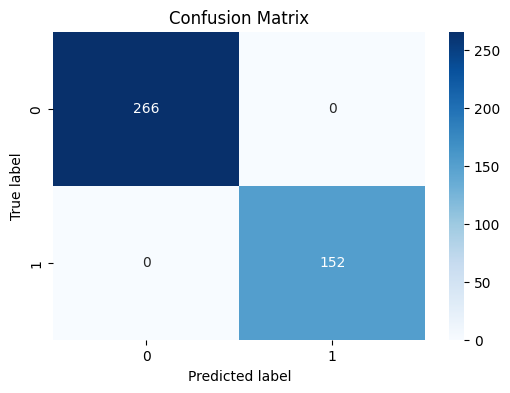


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       152

    accuracy                           1.00       418
   macro avg       1.00      1.00      1.00       418
weighted avg       1.00      1.00      1.00       418

Adjusted Rand Index (ARI): 0.4830


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, adjusted_rand_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Initialize KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the model and predict clusters on the test data
kmeans.fit(X_test[['Sex_male', 'Pclass_3']])
clusters = kmeans.predict(X_test[['Sex_male', 'Pclass_3']])

# Map clusters to the actual labels for performance comparison
y_test_array = np.array(y_test)

cluster_mapping = {}
for cluster in np.unique(clusters):
    mask = clusters == cluster
    unique_labels, counts = np.unique(y_test_array[mask], return_counts=True)
    cluster_mapping[cluster] = unique_labels[np.argmax(counts)]  # Map to the most common class label

# Convert clusters to predicted labels
cluster_labels = np.array([cluster_mapping[cluster] for cluster in clusters])

# Confusion matrix
cm = confusion_matrix(y_test, cluster_labels)
print("Confusion Matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, cluster_labels))

# Adjusted Rand Index (ARI) for clustering performance
ari = adjusted_rand_score(y_test, clusters)
print(f"Adjusted Rand Index (ARI): {ari:.4f}")


In [ ]:
X_test[['Sex_male', 'Pclass_3']]


,Sex_male,Pclass_3
0,True,True
1,False,True
2,True,False
3,True,True
4,False,True
...,...,...
413,True,True
414,False,False
415,True,True
416,True,True
